In [9]:
import pandas as pd
df=pd.read_csv("Placement.csv")
print("No of rows={0} and columns={1}".format(df.shape[0],df.shape[1]))

No of rows=215 and columns=15


In [10]:
dataset=df.drop('sl_no',axis=1)

<h3> 1)Replace the NaN values with correct value. And justify why you have chosen the same. </h3>

In [11]:
#check missing values
dataset.isnull().sum()


gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [12]:
#Reason for missing values occur Here,Students status is not placed,So they didn't got salary
null_mask=dataset.isnull().any(axis=1)
null_rows=dataset[null_mask]
null_rows.head(5)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
3,M,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
5,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,F,46.0,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
9,M,58.0,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN
12,F,47.0,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,NaN


<h3><p style="color : green";>Solution:1.Filling with correct reason,In this case we can't apply cenral Tendency because if we find out mean,median,average means we fill salary with some values 

<p style="color : green";>2.So, that students status considered as Placed and that dataset original information was totally changed So,This method not use for this placement dataset.

<p style="color : green";>3.So,Here we replace the missing values with '0' So,that we got Dataset without any information Loss.</p></h3>


In [13]:
#Replace missing value
dataset['salary'].fillna(0,inplace=True)

In [14]:
dataset.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [24]:
from univariate import univar
quan,qual=univar.QuanQual(dataset)

In [29]:
quan

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [107]:
descriptive=univar.Central_tendency(dataset,quan)

In [108]:
descriptive

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
Mean,67.3034,66.3347,66.3586,72.1006,62.2782,197615
Median,67,65,66,71,62,240000
Mode,62,63,65,60,56.7,0
Q1:25%,60.6,60.9,61,60,57.945,0
Q2:50%,67,65,66,71,62,240000
Q3:75%,75.7,73,72,83.5,66.255,282500
99%,87,91.129,83.86,97,76.1142,629000
Q4:100%,89.4,91.15,88.5,98,77.89,706250
IQR,15.1,12.1,11,23.5,8.31,282500
1.5rule,22.65,18.15,16.5,35.25,12.465,423750


In [89]:
descriptive['ssc_p']['Lesser']<descriptive['ssc_p']['Minimum']

True

In [109]:
#Find Outlier
Lesser=[]
Greater=[]
for columnname in quan:
    if(descriptive[columnname]['Minimum']<descriptive[columnname]['Lesser']):
        Lesser.append(columnname)
    if(descriptive[columnname]['Maximum']>descriptive[columnname]['Greater']):
        Greater.append(columnname)
    
    

In [110]:
Lesser

[]

In [111]:
Greater

[]

In [106]:
#Replace outlier
#for columnname in Lesser:
    #dataset[columnname][dataset[columnname]<descriptive[columnname]['Lesser']]=descriptive[columnname]['Lesser']
#for columnname in Greater:
    #dataset[columnname][dataset[columnname]>descriptive[columnname]['Greater']]=descriptive[columnname]['Greater']                                                      
                                                          
    # after i run descriptive after that i checked outliers are replaced or not                                                      

<h3>2) How many of them are not placed?</h3>

In [112]:
nplc=dataset[dataset["status"]=="Not Placed"]
nplc.shape[0]

67

<h3>3)Find the reason for non placement from the dataset?</h3>

/home/giuser/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


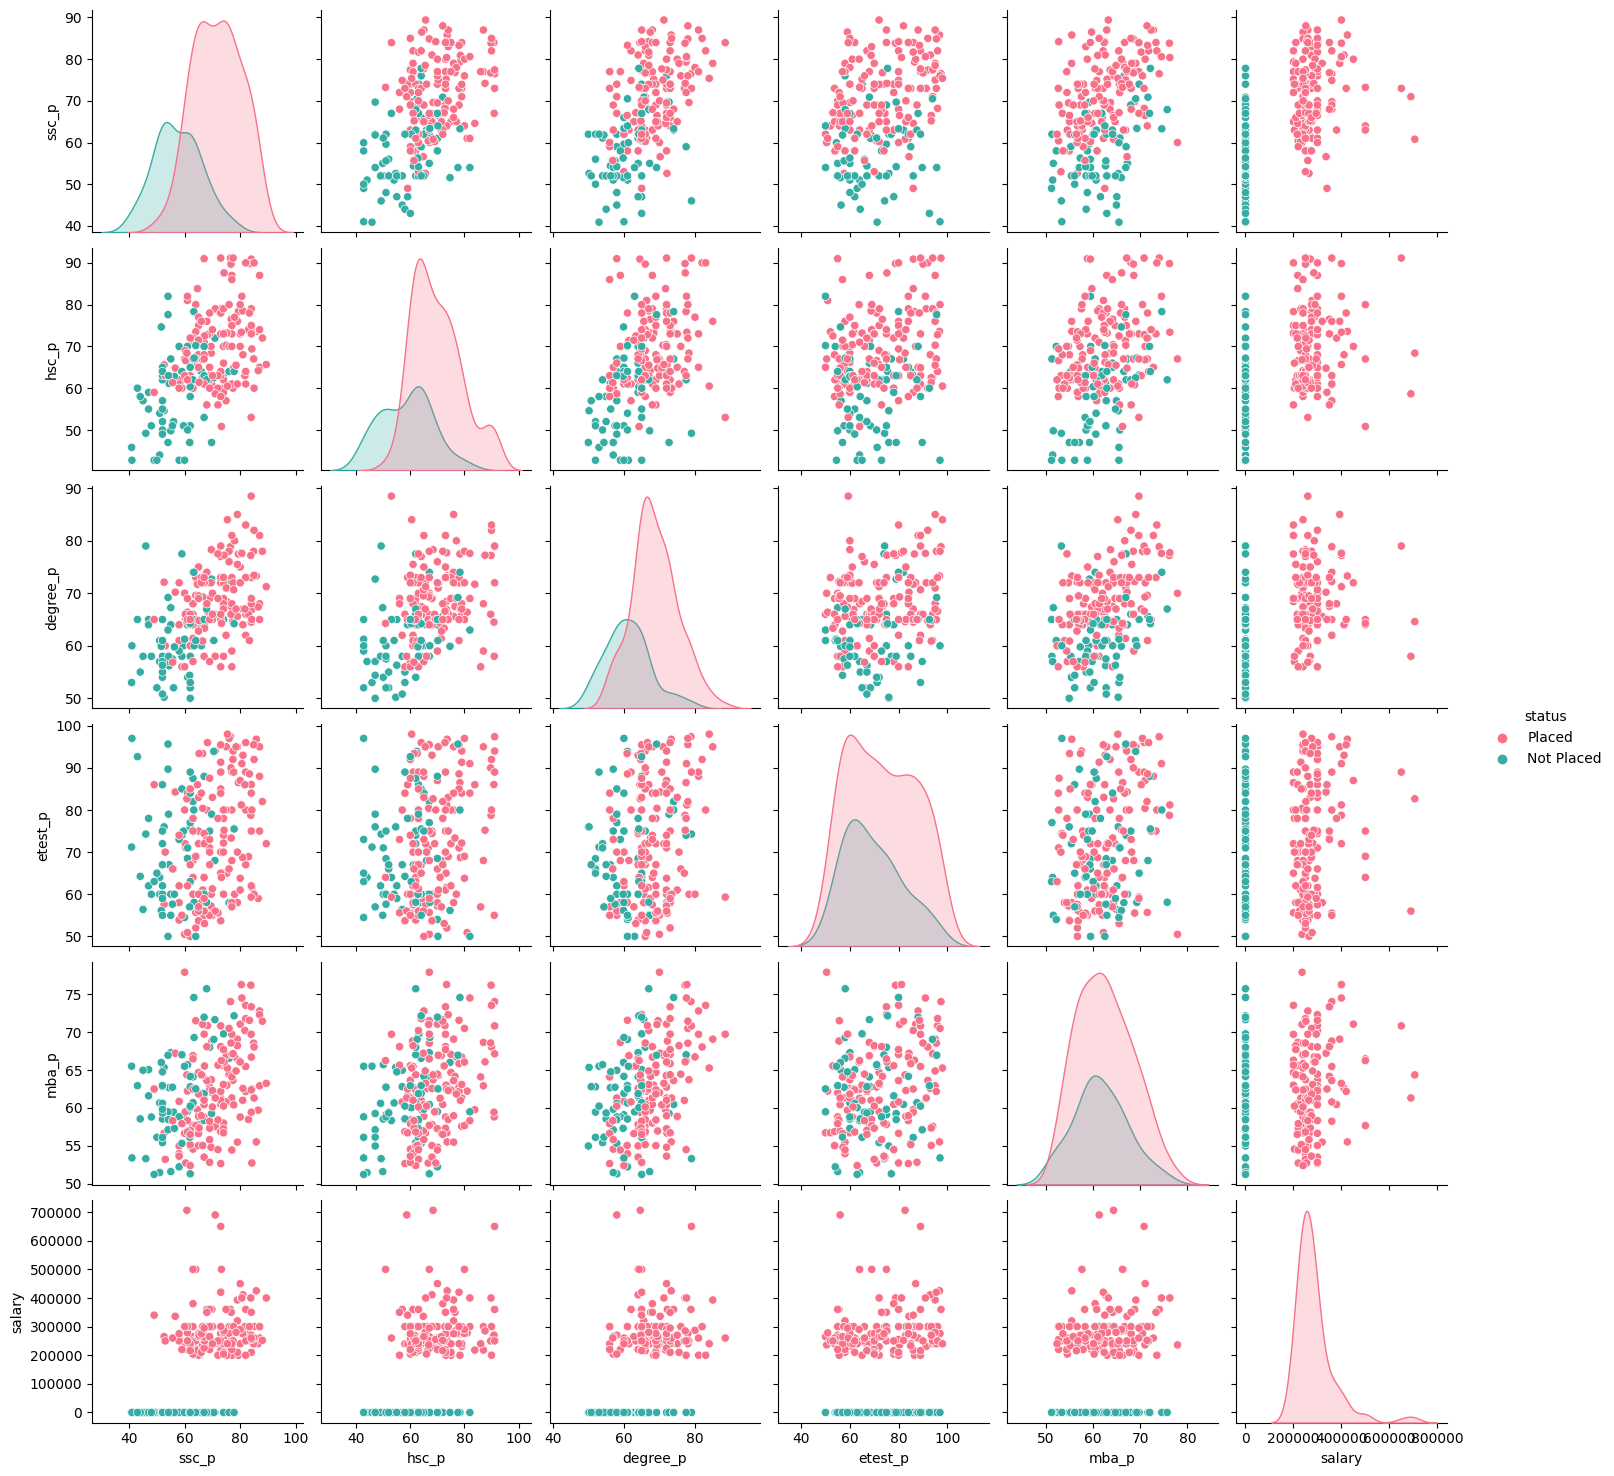

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(dataset,hue='status',diag_kind='kde',kind='scatter',palette='husl') #hue --->differentiate
plt.show()

<h3><p style="color : green";> Solution: As far as i understand from this plot non placement students are got low percentages compared with placed students</p></h3>

<h3>4)What kind of relation between salary and mba_p</h3>

In [121]:
#Relationship between two columns means we will find out corelation

dataset.corr()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.513478,0.538686,0.261993,0.388478,0.558475
hsc_p,0.513478,1.000000,0.434606,0.240775,0.348452,0.459424
degree_p,0.538686,0.434606,1.000000,0.227147,0.402376,0.423762
etest_p,0.261993,0.240775,0.227147,1.000000,0.218055,0.186775
mba_p,0.388478,0.348452,0.402376,0.218055,1.000000,0.141417
salary,0.558475,0.459424,0.423762,0.186775,0.141417,1.000000


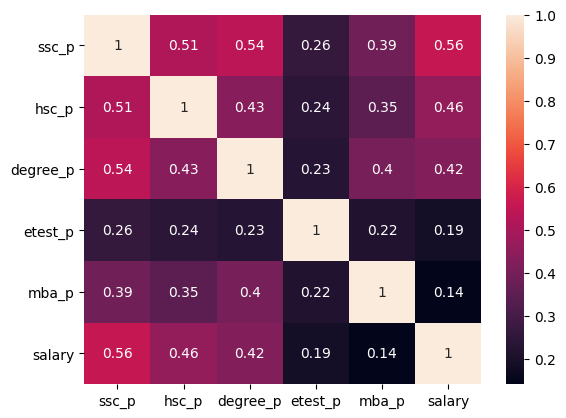

In [123]:
sns.heatmap(dataset.corr(),annot=True)
plt.show()

<h3>
<p style="color:green;">Solution:correlation of salary and mba_p correlation is 0.141417 and it's a positive corelation</p></h3>

<h3>5)Which specialization is getting minimum salary?</h3>

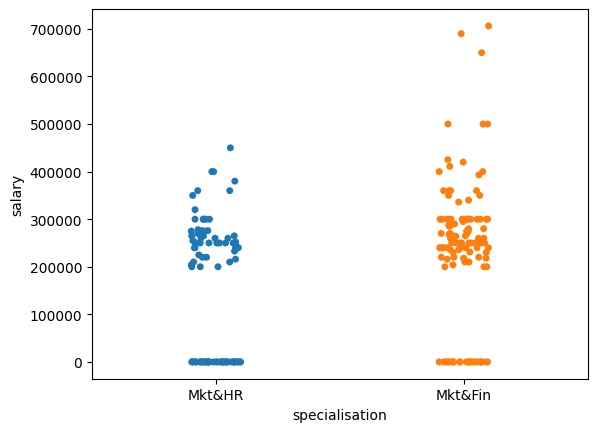

In [124]:
sns.stripplot(x="specialisation",y='salary',data=dataset)
plt.show()




<h3><p style="color:green;"> Solution: From the placement dataset Mkt&HR specialisation only got minimum salary</p></h3>

<h3> 6)How many of them getting above 500000 salary?</h3>

In [125]:
ab_salary=dataset[dataset.salary>500000]
ab_salary

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
119,M,60.8,Central,68.40,Central,Commerce,64.6,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,706250.0
150,M,71.0,Central,58.66,Central,Science,58.0,Sci&Tech,Yes,56.00,Mkt&Fin,61.30,Placed,690000.0
177,F,73.0,Central,91.15,Others,Commerce,79.0,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,Placed,650000.0


<h3> Solution: 3 Students got salary above 500000 </h3>


<h3> 7)Test the Analysis of Variance between etest_p and mba_p at signifance
level 5%.(Make decision using Hypothesis Testing) </h3>

In [126]:
import scipy.stats as stats
stats.f_oneway(dataset['etest_p'],dataset['mba_p'])

F_onewayResult(statistic=98.64487057324706, pvalue=4.672547689133573e-21)

<h3>
<p style="color:green;"> Solution:Here,pvalue > 5% So,we Accept Alternate hypothesis h1,There is significant variance between etest_p and mba_p</p></h3>


<h3>8)Test the similarity between the degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary at significance level of 5%.(Make
decision using Hypothesis Testing)</h3>

In [127]:
from scipy.stats import ttest_ind
degree_t=dataset[dataset['degree_t']=='Sci&Tech']['salary']
speci=dataset[dataset['specialisation']=='Mkt&HR']['salary']
ttest_ind(degree_t,speci)

Ttest_indResult(statistic=2.692041243555374, pvalue=0.007897969943471179)

 <h3>
<p style="color:green;"> Solution:There is no similarity between the degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary.
    Here,pvalue=0.00789 Reject null hypothesis h0</p> </h3>

<h3>9)Convert the normal distribution to standard normal distribution for
salary column</h3>

In [132]:
def snd(dataset):
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()
    values=[i for i in dataset]
    #print(values)
    z_score=[((j-mean)/std) for j in values]
    #print(z_score)
    sns.distplot(z_score,kde=True)
    print(sum(z_score)/len(z_score))
    plt.show()

-1.115386852646669e-16


/home/giuser/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


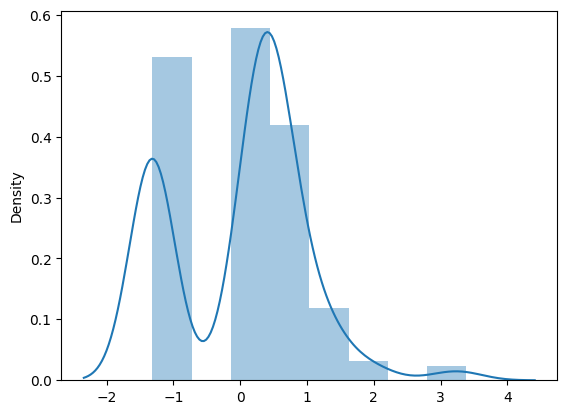

In [145]:
snd(dataset['salary'])

<h3><p style="color:green";>Solution: In this case mean,median mode are not same so we got curve like this. this plot says about imbalanced which means salary columns have different salaries.</p></h3>

<h3>10)What is the probability Density Function of the salary range from
700000 to 900000?</h3>

In [83]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    import matplotlib.pyplot as plt
    from scipy.stats import norm
    import seaborn as sns
    ax=sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    sample=dataset
    sample_mean=sample.mean()
    sample_std=sample.std()
    print('Mean=%.3f,Standard Deviation=%.3f' %(sample_mean,sample_std))
    dist=norm(sample_mean,sample_std)
    values=[value for value in range(startrange,endrange)]
    probabilities=[dist.pdf(value) for value in values]
    prob=sum(probabilities)
    plt.plot(prob, norm.pdf(prob, sample_mean, sample_std))
    plt.show()
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    
    return prob

/home/giuser/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean=198702.326,Standard Deviation=154780.927


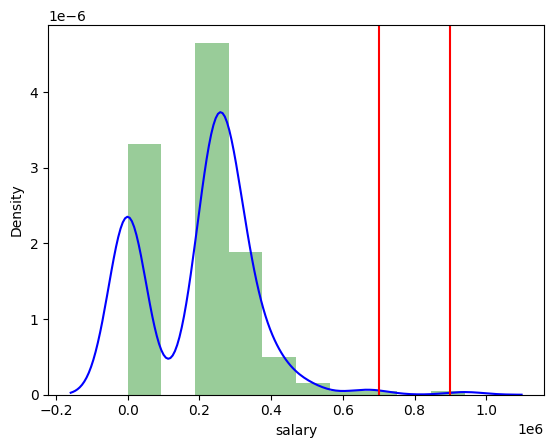

The area between range(700000,900000):0.0005973310593974868


0.0005973310593974868

In [84]:
get_pdf_probability(dataset['salary'], 700000,900000)

<h3>  11)Test the similarity between the degree_t(Sci&Tech)with respect to
etest_p and mba_p at significance level of 5%.(Make decision using Hypothesis Testing)</h3>

In [85]:
from scipy.stats import ttest_rel
degree=dataset[dataset['degree_t']=='Sci&Tech']['etest_p']
degree1=dataset[dataset['degree_t']=='Sci&Tech']['mba_p']
ttest_rel(degree,degree1)

Ttest_relResult(statistic=5.0049844583693615, pvalue=5.517920600505392e-06)

<h3><p style="color:green;"> Solution:Null Hypothesis: H0:There is no similarity between the degree_t(Sci&Tech)with respect to etest_p and mba_p.</p></h3>

<h3>12)Which parameter is highly correlated with salary?</h3>

In [86]:
dataset.corr()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


<h3><p style="color : green";>Solution: ssc_p parameter has highly correlated with salary</p></h3>

<h3> 13) plot any useful graph and explain it.</h3>

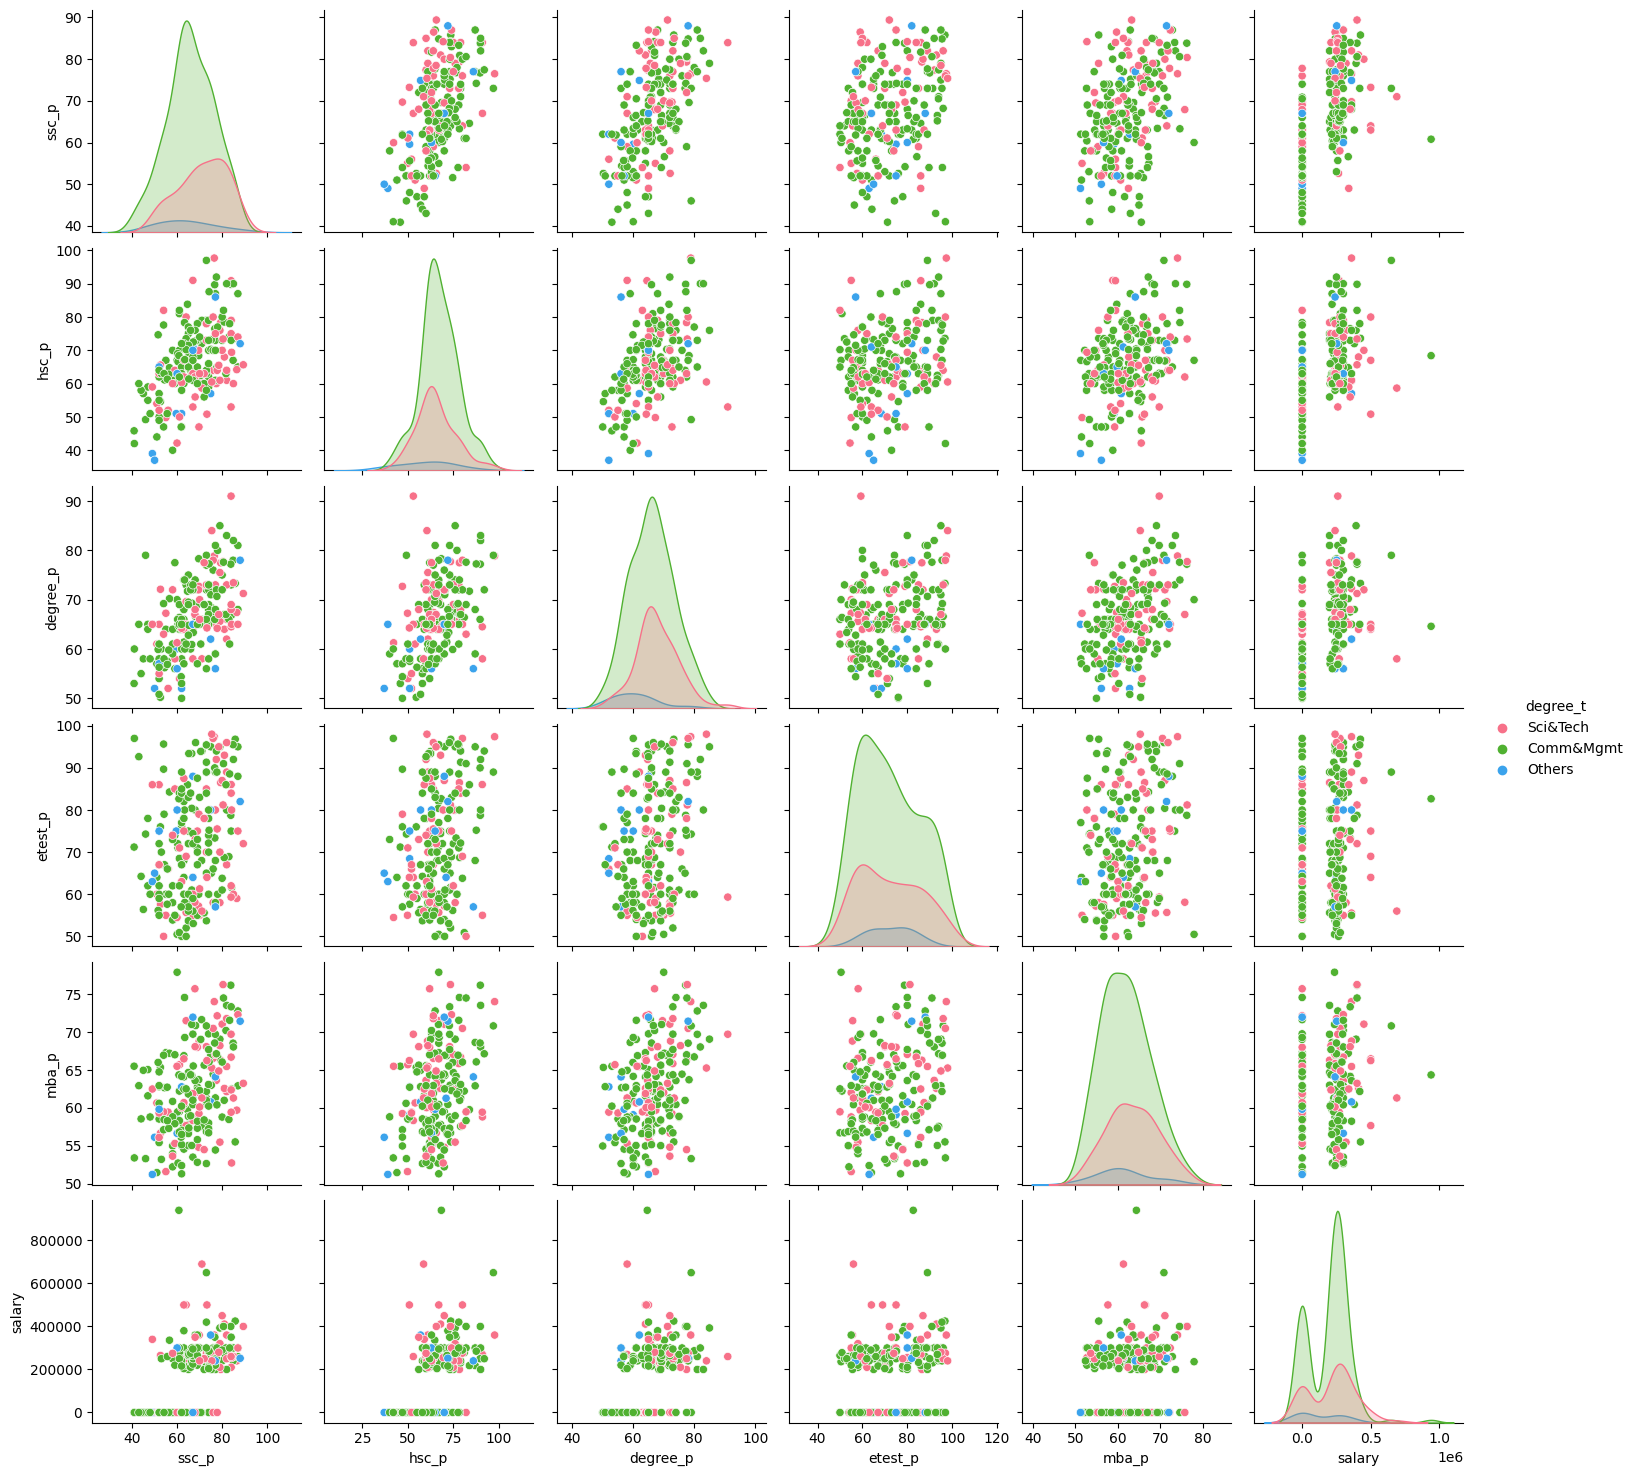

In [87]:
sns.pairplot(dataset,hue='degree_t',diag_kind='kde',kind='scatter',palette='husl') #hue --->differentiate
plt.show()

<h3><p style="color : green";>Solution: By my reckoning from this plot Comm&Mngt degree has good percentage compared with Sci&Tech,others in this columns(ssc_p,hsc_p,degree_p,etest_p,mba_p,salary)</p></h3>